# ```sampley``` exemplar: the point approach
Before going through this exemplar, please consult the Introduction to sampley exemplars (```intro.ipynb```).
<br>This exemplar illustrates an application of the point approach to data contained within a single file (```trackpoints.csv```) containing continuous datapoints (i.e., datapoints recorded at frequent, regular intervals) that can be joined to construct survey tracks.
<br>It differs from the standard point exemplar as having continuous datapoints allows for certain procedures to be applied in Stage 3 that may be more efficient and precise.

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

## Stage 1
In Stage 1, we import a single file (```trackpoints.csv```) to make a ```DataPoints``` object, from which we then make a ```Sections``` object.
<br>Although we use a CSV file in this exemplar, there are other options for file types (including XLSX, GPKG, and SHP files). Please see the Stage 1 exemplar (```stage-1.ipynb```) in the horizontal exemplars folder or the User Manual for more details. Note that, regardless of the input file type, once any ```DataPoints``` and/or ```Sections``` objects have been made, the subsequent processing will be the same.

In [4]:
u_trackpoints = DataPoints.from_file(
    filepath=input_folder+'trackpoints.csv',
    x_col='lon',
    y_col='lat',
    crs_input='EPSG:4326',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00',
    section_id_col='section_id'  
)

Success: file opened.
Success: X and Y coordinates parsed.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".
Success: datapoint IDs generated.


In [5]:
u_sections = Sections.from_datapoints(datapoints=u_trackpoints)

## Stage 2
In Stage 2, we use the ```DataPoints``` object containing sightings data to make a ```Presences``` object which we thin with a spatial threshold of 10000 m and a temporal threshold of 5 days.
<br>Then, we use the ```Presences``` object and the ```Sections``` object to make a ```PresenceZones``` object with the same thresholds. It should be noted that the presence zones object is made from all the presences, not only those kept after spatial thinning.
<br>Finally, we use the ```Sections``` object and the ```PresenceZones``` object to make an ```Absences``` object. We also thin these absences with the same thresholds as well as a target equal to the number of presences kept after thinning.

In [6]:
u_presences = Presences.delimit(
    datapoints=u_trackpoints,
    presence_col='individuals')
u_presences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day')

In [7]:
u_presences.full  # print the presences GeoDataFrame

,point_id,point,date,datapoint_id
0,p01,POINT (579166.78 4742872.701),2019-01-25,d0004
1,p02,POINT (554184.217 4742741.886),2019-01-25,d0068
2,p03,POINT (548599.876 4742700.214),2019-01-25,d0082
3,p04,POINT (520909.741 4714855.058),2019-02-02,d0480
4,p05,POINT (532548.249 4714899.835),2019-02-02,d0510
5,p06,POINT (512817.407 4705582.465),2019-02-02,d0910
6,p07,POINT (504710.41 4705553.392),2019-02-02,d0930
7,p08,POINT (654449.136 4716189.584),2019-02-05,d1306
8,p09,POINT (645666.237 4716110.937),2019-02-05,d1330
9,p10,POINT (643532.681 4716066.52),2019-02-05,d1336


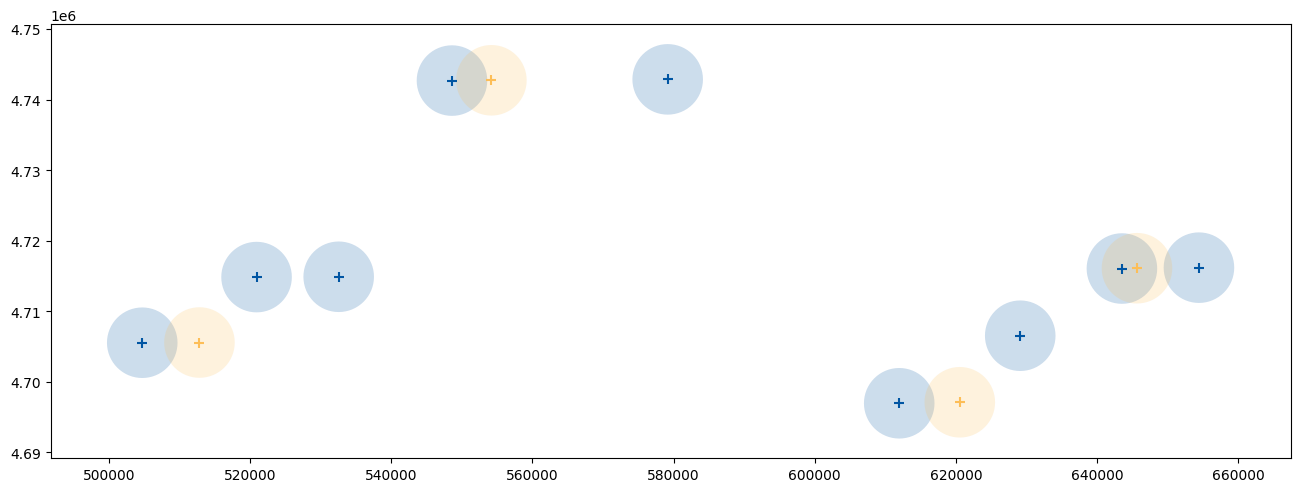

In [8]:
u_presences.plot(which='thinned', sp_threshold=10000)  # plot the presences with their spatial threshold (those kept after thinning in blue, those removed in yellow)

In [9]:
u_presencezones = PresenceZones.delimit(
    sections=u_sections,
    presences=u_presences,
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
)

In [10]:
u_presencezones.presencezones  # print the presence zones GeoDataFrame

,section_id,presencezones
0,s001,"MULTIPOLYGON (((589166.78 4742872.701, 589118...."
1,s002,None
2,s003,"MULTIPOLYGON (((616117.835 4706064.327, 616733..."
3,s004,"MULTIPOLYGON (((616117.835 4706064.327, 616733..."


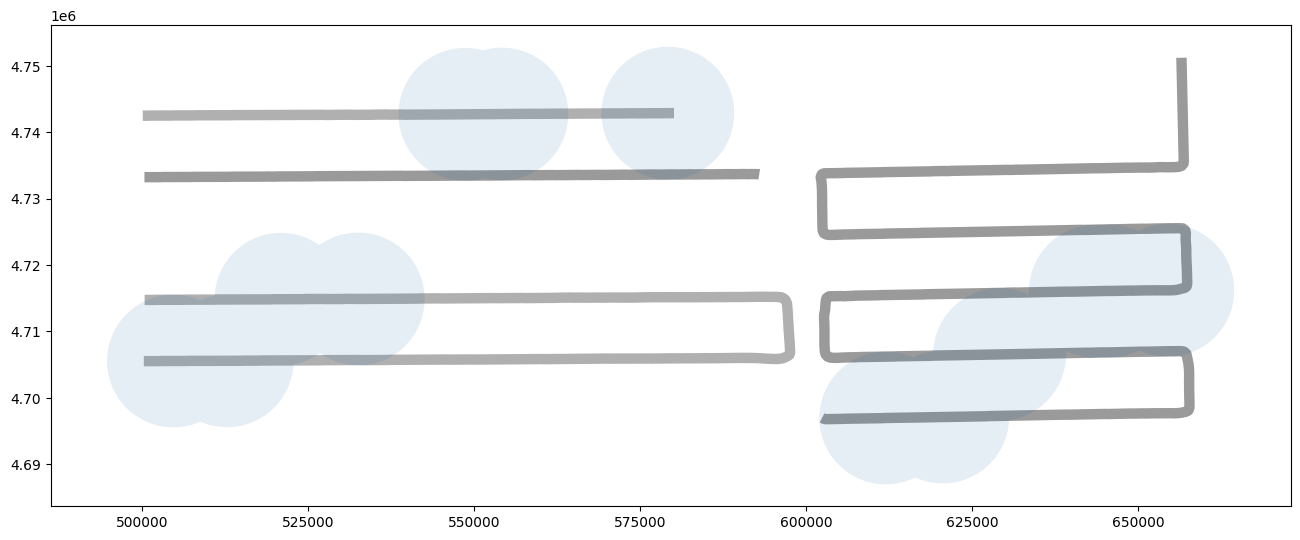

In [11]:
u_presencezones.plot(sections=u_sections)  # plot the presence zones (in blue) over the sections (in grey)

In [12]:
u_absences = Absences.delimit(
    sections=u_sections,
    presencezones=u_presencezones,
    var='along',
    target=20,
    dfls=None)
u_absences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
    target=9)

In [13]:
u_absences.full  # print the absences GeoDataFrame

,point_id,point,date
0,a01,POINT (565655.362 4742805.048),2019-01-25
1,a02,POINT (558900.013 4715036.627),2019-02-02
2,a03,POINT (572790.397 4715111.159),2019-02-02
3,a04,POINT (578147.715 4715160.361),2019-02-02
4,a05,POINT (597005.854 4714466.603),2019-02-02
5,a06,POINT (597563.602 4707298.489),2019-02-02
6,a07,POINT (580427.126 4705945.789),2019-02-02
7,a08,POINT (556612.794 4705819.549),2019-02-02
8,a09,POINT (656816.641 4737268.16),2019-02-05
9,a10,POINT (656829.43 4735418.936),2019-02-05


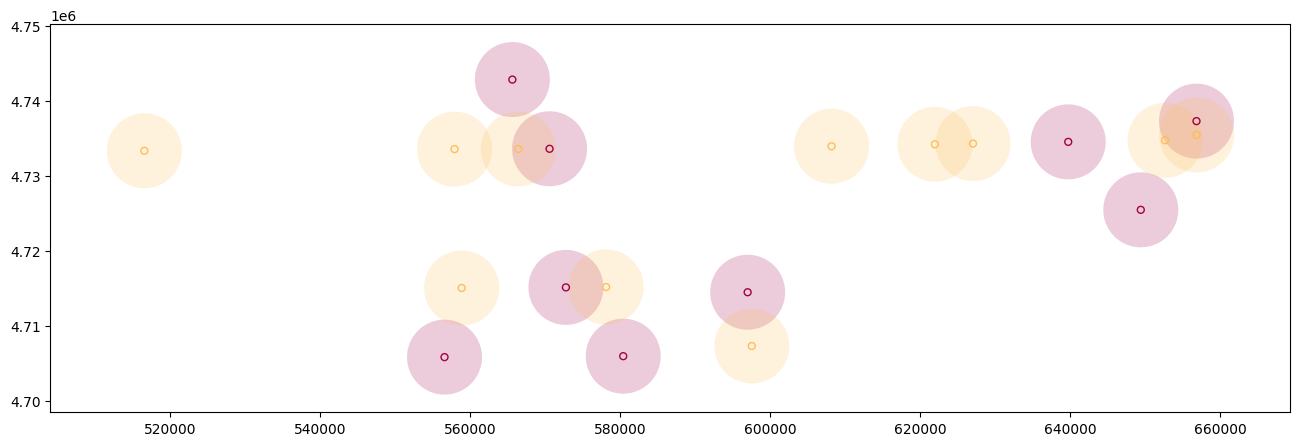

In [14]:
u_absences.plot(which='thinned', sp_threshold=10000)  # plot the absences with their spatial threshold (those kept after thinning in red, those removed in yellow)

## Stage 3
In Stage 3, we make a ```Samples``` object from the ```DataPoints``` object, the ```Presences``` object, the ```Absences``` object, and the ```Sections``` object.
<br>_Note that, as the absences are made from sections that are made from continuous datapoints, we can match those datapoints to the absences by their distance from the beginning of the absences lines in order to give values to the absences. To do so we must input the sections (```sections=u_sections```)._

In [15]:
u_samples = Samples.point(
    datapoints=u_trackpoints,
    presences=u_presences,
    absences=u_absences,
    cols=['individuals', 'bss'],
    sections=u_sections)

## Output
Finally, we save the ```Samples``` object to the output folder.

In [16]:
u_samples.save(
    folder=output_folder,
    filetype='csv'
)

In the output folder, there should be two new CSVs: the first should have the same name as the ```Samples``` object (run the box below to see the name) while the second should also have this name but with ```-parameters``` added at the end.

In [17]:
u_samples.name

'samples-presences-trackpoints-+-absences-as-10000m-5day'

The first CSV should contain the samples, like those shown in the box below. 
<br>In this dataframe, each row represents a given presence or absence, i.e., a sample. 
<br>The column ```point``` delimits the location of the presence/absence.
<br>At the end are the data columns. In this particular example, they are ```p-a``` (presence-absence), ```individuals```, and ```bss```.

In [18]:
u_samples.samples

,point_id,point,date,datapoint_id,p-a,individuals,bss
0,p01,POINT (579166.78 4742872.701),2019-01-25,d0004,1,1.0,2
1,p03,POINT (548599.876 4742700.214),2019-01-25,d0082,1,5.0,2
2,p04,POINT (520909.741 4714855.058),2019-02-02,d0480,1,1.0,1
3,p05,POINT (532548.249 4714899.835),2019-02-02,d0510,1,2.0,1
4,p07,POINT (504710.41 4705553.392),2019-02-02,d0930,1,3.0,1
5,p08,POINT (654449.136 4716189.584),2019-02-05,d1306,1,5.0,1
6,p10,POINT (643532.681 4716066.52),2019-02-05,d1336,1,1.0,2
7,p11,POINT (629124.489 4706545.106),2019-02-05,d1527,1,3.0,2
8,p13,POINT (611976.857 4696974.111),2019-02-05,d1739,1,4.0,3
9,a01,POINT (565655.362 4742805.048),2019-01-25,d0038,0,NaN,2


The second CSV should contain the parameters, like those shown in the box below (but arranged in a table). This information may prove useful if, later, we need to know  how the samples were generated.

In [19]:
u_samples.parameters

{'approach': 'point',
 'resampled': 'datapoints',
 'presences_name': 'presences-trackpoints',
 'presences_crs': 'EPSG:32619',
 'presences_sp_threshold': 10000,
 'presences_tm_threshold': 5,
 'presences_tm_unit': 'day',
 'absences_name': 'absences-as-10000m-5day',
 'absences_var': 'along',
 'absences_target': 20,
 'presencezones_crs': 'EPSG:32619',
 'presencezones_sp_threshold': 10000,
 'presencezones_tm_threshold': 5,
 'presencezones_tm_unit': 'day',
 'absences_sp_threshold': 10000,
 'absences_tm_threshold': 5,
 'absences_tm_unit': 'day'}